In [1]:
import random

import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

# to play the audio files
from IPython.display import Audio
from pydub import AudioSegment
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import openpyxl
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow

In [2]:
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [3]:
# Location of the dataset
# Path for Ravdess dataset
ravdess = "datasets/RavdevsLow"
# Path for Savee dataset
savee = "datasets/Savee"
# Path for Tess dataset
tess = "datasets/TESS"
# Path for CREMA-D dataset
cremaD = "datasets/CremaD"

In [4]:
ravdess_directory_list = os.listdir(ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(ravdess + "/" + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + "/" + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# Happy and surprise merged, 8 was initially surprise
#
# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1: 'neutral', 2: 'neutral', 3: 'happy', 4: 'sad',
                             5: 'angry', 6: 'fear', 7: 'disgust', 8: 'happy'}, inplace=True)
Ravdess_df.head()
print(Ravdess_df.shape)


(1440, 2)


In [5]:
crema_directory_list = os.listdir(cremaD)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(cremaD + "/" + file)
    # storing file emotions
    part = file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()


,Emotions,Path
0,angry,datasets/CremaD/1001_DFA_ANG_XX.wav
1,disgust,datasets/CremaD/1001_DFA_DIS_XX.wav
2,fear,datasets/CremaD/1001_DFA_FEA_XX.wav
3,happy,datasets/CremaD/1001_DFA_HAP_XX.wav
4,neutral,datasets/CremaD/1001_DFA_NEU_XX.wav


In [6]:
tess_directory_list = os.listdir(tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(tess + "/" + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part == 'ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(tess + "/" + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
print(Tess_df.shape)
Tess_df.head()


(2800, 2)


,Emotions,Path
0,angry,datasets/TESS/OAF_angry/OAF_back_angry.wav
1,angry,datasets/TESS/OAF_angry/OAF_bar_angry.wav
2,angry,datasets/TESS/OAF_angry/OAF_base_angry.wav
3,angry,datasets/TESS/OAF_angry/OAF_bath_angry.wav
4,angry,datasets/TESS/OAF_angry/OAF_bean_angry.wav


In [7]:
savee_directory_list = os.listdir(savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(savee + "/" + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele == 'a':
        file_emotion.append('angry')
    elif ele == 'd':
        file_emotion.append('disgust')
    elif ele == 'f':
        file_emotion.append('fear')
    elif ele == 'h':
        file_emotion.append('happy')
    elif ele == 'n':
        file_emotion.append('neutral')
    elif ele == 'sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
print(Savee_df.shape)
Savee_df.head()

(480, 2)


,Emotions,Path
0,angry,datasets/Savee/DC_a01.wav
1,angry,datasets/Savee/DC_a02.wav
2,angry,datasets/Savee/DC_a03.wav
3,angry,datasets/Savee/DC_a04.wav
4,angry,datasets/Savee/DC_a05.wav


In [8]:
# data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df,emoDB_df, jl_df, jl2_df, iemocap_df], axis = 0)
# data_path = pd.concat([Crema_df, Tess_df, Savee_df], axis=0)
# data_path = pd.concat([Savee_df], axis=0)
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)
data_path.to_csv("data_path_4DS.csv", index=False)
data_path.head()

,Emotions,Path
0,neutral,datasets/RavdevsLow/Actor_01/03-01-01-01-01-01...
1,neutral,datasets/RavdevsLow/Actor_01/03-01-01-01-01-02...
2,neutral,datasets/RavdevsLow/Actor_01/03-01-01-01-02-01...
3,neutral,datasets/RavdevsLow/Actor_01/03-01-01-01-02-02...
4,neutral,datasets/RavdevsLow/Actor_01/03-01-02-01-01-01...


In [9]:
emotionList = pd.read_csv("data_path_4DS.csv")
emotions = emotionList["Emotions"]
emotionCount = {}
for item in emotions:
    if item in emotionCount:
        emotionCount[item] += 1
    else:
        emotionCount[item] = 1
emotionCount = dict(sorted(emotionCount.items(), key=lambda x: x[0]))
print(emotionCount)

{'angry': 1923, 'disgust': 1923, 'fear': 1923, 'happy': 2115, 'neutral': 1895, 'sad': 1923, 'surprise': 460}


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

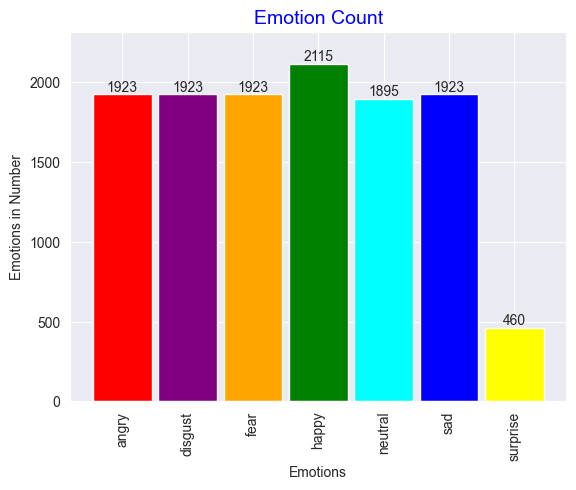

In [10]:
plt.bar(emotionCount.keys(), emotionCount.values(), width=0.9, align="center",
        color=["red", "purple", "orange", "green", "cyan", "blue", "yellow"])
plt.xlabel("Emotions")
plt.xticks(rotation=90)
plt.ylabel("Emotions in Number")
plt.title("Emotion Count", size=14, color="Blue")
plt.ylim([0, max(emotionCount.values()) + 200])
lst = []
for item in emotionCount:
    plt.text(item, emotionCount[item],
             emotionCount[item], ha="center", va="bottom")
sorted(emotionCount)


In [11]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()


def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    # librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()


In [12]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data


def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)


def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)


def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


def volumeAdd(data):
    songData = AudioSegment.from_wav(data)
    print("sing", songData)
    songDataSamples = np.array(songData.get_array_of_samples())
    songHighVolumed = songDataSamples - 10000.0
    print(songHighVolumed)
    return songHighVolumed


datasets/RavdevsLow/Actor_01/03-01-01-01-01-02-01.wav


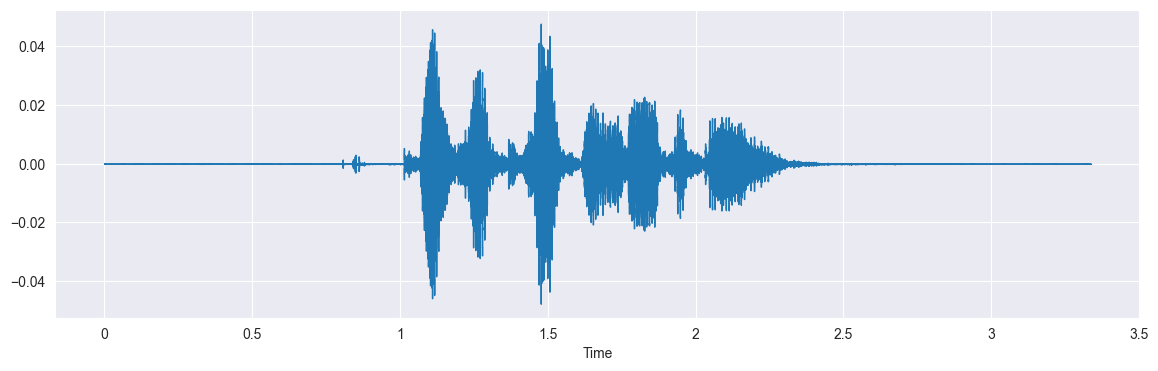

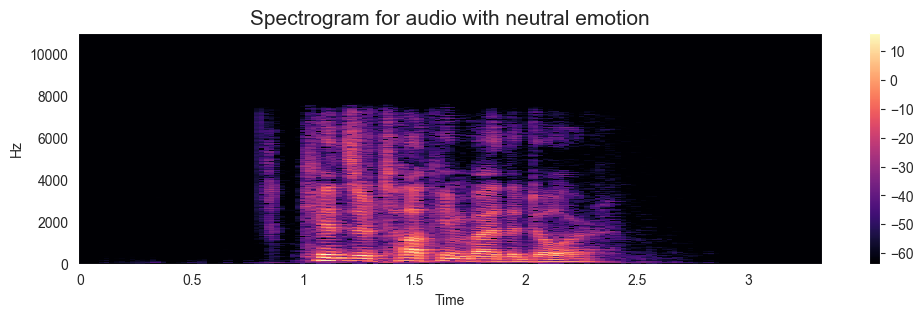

In [13]:
# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
print(path)
data, sample_rate = librosa.load(path)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)
create_spectrogram(data, sample_rate, np.array(data_path.Emotions)[1])

In [14]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))  # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(
        S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))  # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))  # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))  # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(
        y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))  # stacking horizontally

    return result


def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))  # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3))  # stacking vertically

    return result


In [15]:
# X, Y = [], []
# for path, emotion in zip(data_path.Path, data_path.Emotions):
#     try:
#         feature = get_features(path)
#     except:
#         print(path)
#         print(emotion)
#     for ele in feature:
#         try:
#             X.append(ele)
#             # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
#             Y.append(emotion)
#         except:
#             print(ele)

In [16]:
# len(X), len(Y), data_path.Path.shape

In [17]:
# Features = pd.DataFrame(X)
# Features['labels'] = Y
# Features.to_excel('features_RTCS.xlsx', index=False)
# Features.head()


In [18]:
# X = Features.iloc[:, :-1].values
# Y = Features['labels'].values
# y_labels = Y

In [30]:
features_df = pd.read_excel("features_RTCS.xlsx")

In [31]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.224306,0.664190,0.693038,0.665390,0.673116,0.696442,0.684787,0.706183,0.748844,0.782297,...,6.888786e-17,6.993841e-17,7.601734e-17,7.305700e-17,6.833248e-17,7.254372e-17,7.962737e-17,7.395194e-17,7.358765e-17,angry
1,0.308928,0.755333,0.812131,0.803710,0.796962,0.809329,0.734759,0.672464,0.712736,0.748664,...,3.356603e-05,3.340473e-05,3.203857e-05,3.312319e-05,3.185139e-05,3.259582e-05,3.414738e-05,3.431663e-05,3.271565e-05,angry
2,0.169383,0.579495,0.662042,0.674849,0.631609,0.623019,0.687452,0.671907,0.692694,0.712601,...,1.885160e-15,1.743947e-15,1.590055e-15,1.477827e-15,1.528373e-15,1.689925e-15,1.679742e-15,1.602365e-15,1.500745e-15,angry
3,0.196533,0.652948,0.692924,0.664361,0.648762,0.686783,0.688136,0.683010,0.735986,0.759067,...,7.385022e-17,6.953341e-17,7.445123e-17,7.997667e-17,7.754530e-17,8.110750e-17,7.647289e-17,7.359221e-17,7.287654e-17,angry
4,0.319241,0.765809,0.807763,0.817779,0.787595,0.785090,0.760300,0.660346,0.684700,0.735577,...,8.328371e-05,7.988842e-05,8.487882e-05,7.980305e-05,7.816216e-05,8.222267e-05,8.504779e-05,8.008545e-05,8.536907e-05,angry


In [40]:
from sklearn.neighbors import NearestNeighbors

# Calculate the distances to the 161st nearest neighbor for each point
k = 161
C = features_df.iloc[:, :161].values

nbrs = NearestNeighbors(n_neighbors=k).fit(C)
distances, indices = nbrs.kneighbors(C)

# Calculate the average distance to the k nearest neighbors
avg_distance = np.mean(distances[:, k-1])

# Set eps to a fraction of the average distance
eps = 0.5 * avg_distance
print(eps)

20.936720600016038


Text(0, 0.5, 'Feature 2')

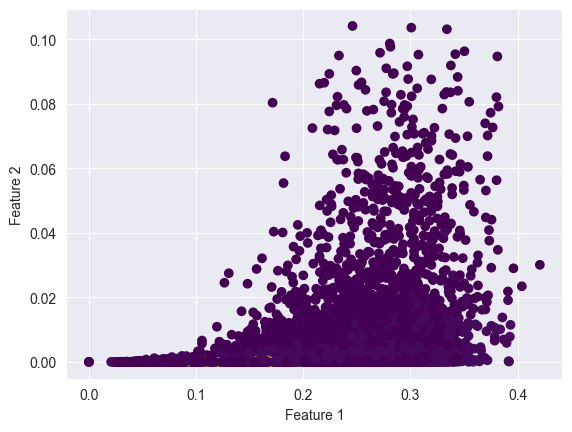

In [55]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=5)
X = features_df.iloc[:, :161].values

clusters  = dbscan.fit_predict(C)
plt.scatter(X[:, 0], X[:, -1], c=clusters, cmap="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [76]:
labels = dbscan.labels_
X_df = pd.DataFrame(X)
db_cluster = pd.DataFrame(labels)

df = pd.concat([X_df, db_cluster], axis=1)
columns = list(df.columns)

db_cluster = df.iloc[:,-1]
# df.columns = ['Feature 1', 'Feature 2', 'db_cluster']
db_cluster.head()

0    0
1    1
2    0
3    0
4    1
Name: 0, dtype: int64

In [77]:
view_cluster = db_cluster.value_counts().T
view_cluster = pd.DataFrame(data=view_cluster)
view_cluster = view_cluster.reset_index()
view_cluster.columns = ['db_cluster', 'count']
view_cluster.sort_values(by='db_cluster', ascending=False)

,db_cluster,count
45,78,5
14,77,11
20,76,9
10,75,13
7,74,18
...,...,...
79,3,2
31,2,6
0,1,20169
2,0,1444


In [78]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 79


In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram
C = features_df.iloc[:, :161].values
Z = linkage(C, method='ward')

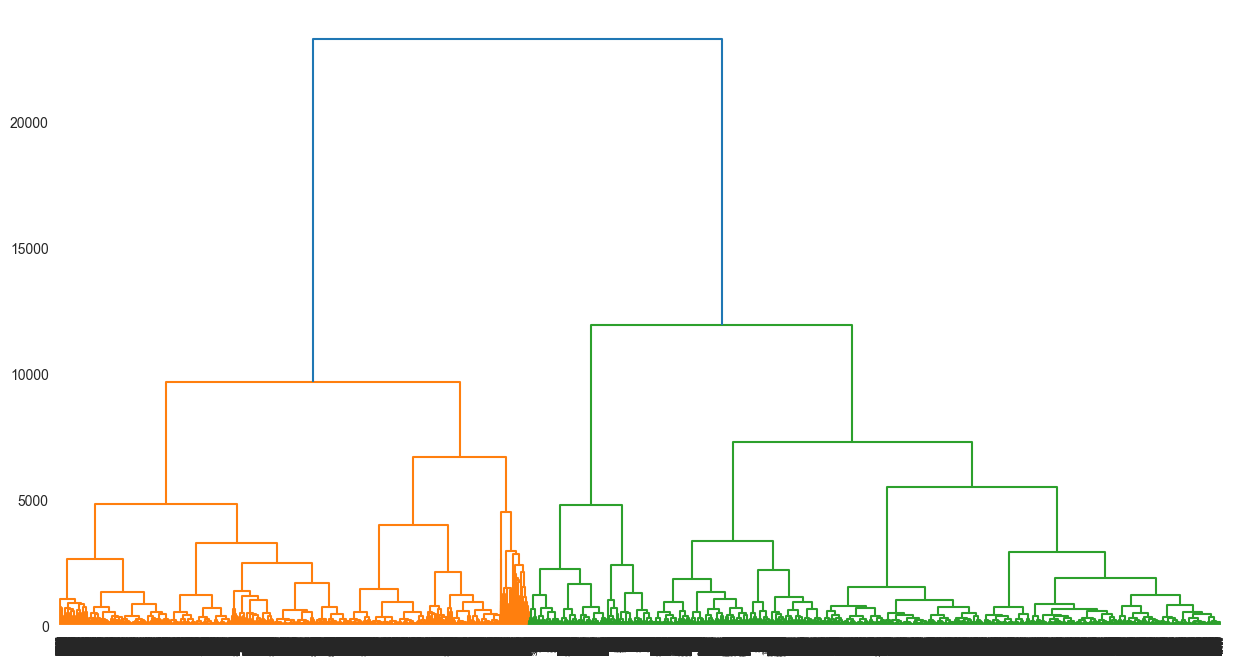

In [24]:
plt.figure(figsize=(15, 8))
dendrogram(Z)
plt.show()

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load the data into a pandas dataframe
df = features_df
scaler = MinMaxScaler()
# Normalize the features using StandardScaler

df.iloc[:, :161] = scaler.fit_transform(df.iloc[:, :161])

# Perform k-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(df.iloc[:, :161])

# Assign the new labels based on the cluster assignments
df['new_label'] = kmeans.labels_

# Save the new labels to a file
df.to_csv('audio_file_data_with_new_labels.csv', index=False)


In [40]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,labels,new_label
0,0.532994,0.716031,0.714752,0.715011,0.697297,0.733554,0.727732,0.708525,0.751832,0.787524,...,2.823972e-16,4.512597e-16,5.661915e-16,5.586227e-16,6.919056e-16,7.642095e-16,6.916971e-16,7.358765e-17,angry,0
1,0.734071,0.814289,0.837577,0.863645,0.825591,0.852457,0.780838,0.674694,0.715580,0.753667,...,1.348816e-04,1.901897e-04,2.567046e-04,2.603873e-04,3.108916e-04,3.277234e-04,3.209749e-04,3.271565e-05,angry,0
2,0.402486,0.624726,0.682786,0.725174,0.654299,0.656219,0.730564,0.674135,0.695458,0.717363,...,7.041708e-15,9.439002e-15,1.145316e-14,1.249456e-14,1.611813e-14,1.612102e-14,1.498745e-14,1.500745e-15,angry,1
3,0.467000,0.703913,0.714635,0.713904,0.672068,0.723381,0.731290,0.685275,0.738922,0.764139,...,2.807619e-16,4.419629e-16,6.198189e-16,6.339382e-16,7.735851e-16,7.339350e-16,6.883324e-16,7.287654e-17,angry,0
4,0.758576,0.825583,0.833072,0.878764,0.815888,0.826926,0.807980,0.662536,0.687432,0.740493,...,3.225734e-04,5.038639e-04,6.184733e-04,6.389811e-04,7.842213e-04,8.162310e-04,7.490659e-04,8.536907e-05,angry,0


In [26]:
featuresofit = np.asarray(features_df.iloc[:, :-1].values)
X = featuresofit
labelofit = np.asarray(features_df['labels'])
Y = labelofit
X.shape

(34530, 163)

In [22]:
emotionsfromFeatures = features_df['labels']
emotionCountfromFeatures = {}
for item in emotionsfromFeatures:
    if item in emotionCountfromFeatures:
        emotionCountfromFeatures[item] += 1
    else:
        emotionCountfromFeatures[item] = 1
print(emotionCountfromFeatures)

{'angry': 5769, 'disgust': 5769, 'fear': 5769, 'happy': 5769, 'neutral': 5685, 'sad': 5769}


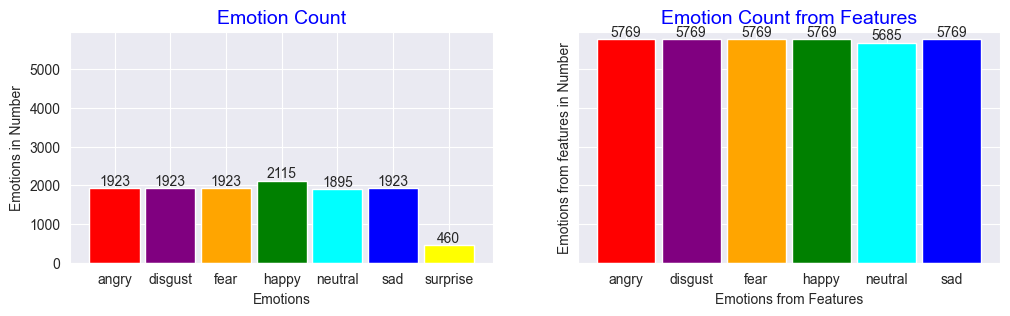

In [23]:
fig, (plt1, plt2) = plt.subplots(1, 2, sharey=True, figsize=(12, 3))
plt1.bar(emotionCount.keys(), emotionCount.values(), width=0.9, align="center",
         color=["red", "purple", "orange", "green", "cyan", "blue", "yellow"])
plt1.set_xlabel("Emotions")
plt1.set_ylabel("Emotions in Number")
plt1.set_title("Emotion Count", size=14, color="Blue")
plt1.set_ylim([0, max(emotionCount.values()) + 200])
# lst = []
for item in emotionCount:
    plt1.text(item, emotionCount[item],
              emotionCount[item], ha="center", va="bottom")

plt2.bar(emotionCountfromFeatures.keys(), emotionCountfromFeatures.values(), width=0.9, align="center",
         color=["red", "purple", "orange", "green", "cyan", "blue", "yellow"])
plt2.set_xlabel("Emotions from Features")
plt2.set_ylabel("Emotions from features in Number")
plt2.set_title("Emotion Count from Features", size=14, color="Blue")
plt2.set_ylim([0, max(emotionCountfromFeatures.values()) + 200])
# lst = []
for item in emotionCountfromFeatures:
    plt2.text(item, emotionCountfromFeatures[item],
              emotionCountfromFeatures[item], ha="center", va="bottom")
# plt2.subplots(nrows=1,ncols=2)

In [24]:
# print(Y)
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, random_state=0, test_size=0.1, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# pd.DataFrame(Y)

((31077, 163), (31077,), (3453, 163), (3453,))

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

ValueError: could not convert string to float: 'fear'

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# x_train = pca.fit_transform(x_train)
# x_test = pca.fit_transform(x_test)

In [ ]:
# C_choice = [150,200,250,300,350]
# C_choice = [0.5, 0.6, 0.8, 0.9, 1]


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

classifier = svm.SVC(kernel='linear', gamma="auto", C=1)
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)
accuracyPercent = accuracy_score(y_test, y_predict) * 100
print("Kernel:  " + "linear" + "  ||  " + " C: " + str(1) + "  ||  Accuracy" + "  :  " + str(accuracyPercent))

In [ ]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

confusion = confusion_matrix(y_test, y_predict)
# df_confusion = pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

plot_confusion_matrix(confusion, classes=["angry", "disgust", "fear", "happy", "neutral", "sad"],
                      title='Confusion Matrix')
plt.show()


In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
import joblib
joblib.dump(classifier,"audio_svm_model_4DS.joblib")

In [ ]:
from joblib import dump
dump(scaler, 'scaler.joblib')